In [50]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

speed = 1
x_min = 0.0
x_max = 4.5
t_max = (x_max - 1.5) / speed


def step_func(x, x0=0.5, eps=0.45):
    xi = np.abs((x - x0) / eps)
    return np.heaviside(1.0 - xi, 0.0)


def parabola(x, x0=0.5, eps=0.45):
    xi = np.abs((x - x0) / eps)
    return (1.0 - xi ** 2) * np.heaviside(1.0 - xi, 0.0)


def exp_func(x, x0=0.5, eps=0.45):
    xi = np.abs((x - x0) / eps)
    return np.exp(-xi ** 2 / (np.abs(1.0 - xi ** 2) + 1e-10)) * np.heaviside(1.0 - xi, 0.0)


def sin_func(x, x0=0.5, eps=0.45):
    xi = np.abs((x - x0) / eps)
    return np.cos(0.5 * np.pi * xi) ** 3 * np.heaviside(1.0 - xi, 0.0)

x0 = 0.5
t0 = 0.8
eps = 0.45

In [51]:
C = 0.5

h1 = 1e-2
t1 = C * h1 / speed
N1 = round(x_max / h1)
X1 = [0 + i * h1 for i in range(N1)]


h2 = 1e-3
t2 = C * h2 / speed
N2 = round(x_max / h2)
X2 = [0 + i * h2 for i in range(round(N2))]

In [52]:
# function returns unkown point using triangle method
def triangle(b, c: float):
    return c - C * (c - b)

In [53]:
print(len(X1))
print(len(X2))
print(t1)
print(t2)
print("N1=", N1)
print("N2=", N2)

450
4500
0.005
0.0005
N1= 450
N2= 4500


In [54]:
from celluloid import Camera
frames = 1500

def create_anim_triangle(phi, mu):
    # initial condition
    u1 = np.array([phi(x) for x in X1])
    u2 = np.array([phi(x) for x in X2])

    errors1 = []
    errors2 = []

    fig, (ax1, ax2) = plt.subplots(2, 1)
    fig.set_figwidth(20)
    fig.set_figheight(8)

    time1 = 0
    time2 = 0

    camera = Camera(fig)

    for i in range(1, frames):
        v1 = np.array([triangle(u1[N1-2], u1[0])] + [triangle(u1[j - 1], u1[j]) for j in range(1, N1)])
        v2 = np.array([triangle(u2[N1-2], u2[0])] + [triangle(u2[j - 1], u2[j]) for j in range(1, N2)])

        time1 += t1
        time2 += t2

        for _ in range(9):
            u2 = v2
            time2 += t2
            v2 = [triangle(u2[N2-2], u2[0])] + [triangle(u2[j - 1], u2[j]) for j in range(1, N2)]
        if i % 5 == 0:
            ax1.annotate("Схема уголок (С=0,5). t = {}".format(round(time1, 1)), (1.7, 1.07), annotation_clip=False)
            ax1.plot(X1, v1, color='green')
            ax1.plot(X2, v2, color='orange')

            true_func = [phi(x - speed * time1) for x in X1]

            ax1.plot(X1, true_func, color='blue')
            
            errors1.append((max(np.array([phi(x - speed * i * t1) for x in X1]) - v1)))
            errors2.append((max(np.array([phi(x - speed * i * 10 * t2) for x in X2]) - v2)))

            ax2.plot(errors1, color='green')
            ax2.plot(errors2, color='orange')

            ax1.legend(['h=10e-2', 'h=10e-3', 'exact'])
            ax2.legend(['h=10e-2', 'h=10e-3'])

            camera.snap()

        u1 = v1
        u2 = v2
        
    print(str(phi.__name__), "e_0.01/e_0.001 = ", errors1[-1] / errors2[-1])
    anim = camera.animate(interval = 200, repeat = True, repeat_delay = 500)
    anim.save('triangle_test_' + str(phi.__name__) + '.gif', writer='pillow', fps=30)


In [55]:
# f = [step_func, parabola, exp_func, sin_func]
# for func in f:
#     mu = None
#     if func.__name__ == 'step_func':
#         mu = lambda t: step_func(t, x0=t0, eps=eps)
#     elif func.__name__ == 'parabola':
#         mu = lambda t: parabola(t, x0=t0, eps=eps)
#     elif func.__name__ == 'exp_func':
#         mu = lambda t: exp_func(t, x0=t0, eps=eps)
#     elif func.__name__ == 'sin_func':
#         mu = lambda t: sin_func(t, x0=t0, eps=eps)
#     create_anim_triangle(func, mu)

step_func e_0.01/e_0.001 =  5.445254407254046e-13


C:\Users\1235455\AppData\Local\Temp\ipykernel_2968\3918934528.py:57: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  anim.save('triangle_test_' + str(phi.__name__) + '.gif', writer='pillow', fps=30)


KeyboardInterrupt: 

C:\Users\1235455\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


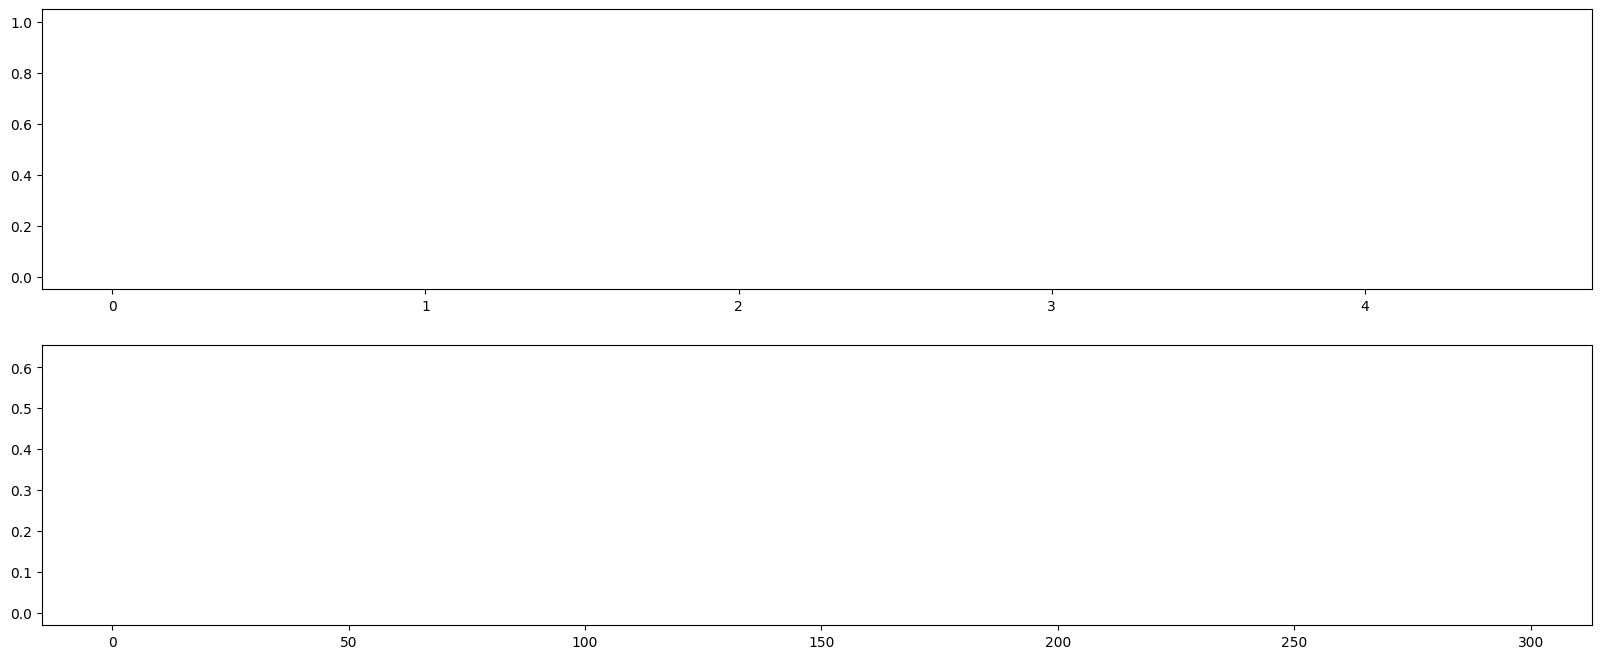

In [56]:
mu = lambda t: step_func(t, x0=t0, eps=eps)
create_anim_triangle(step_func, mu)